### Contrôle Continu - LU2PY222 : Modélisation Numérique en Physique
#### 5 mars 2025, 10h45 - 12h45

Vous rendrez sur Moodle un **compte-rendu** sous la forme d'un calepin **Jupyter** comprenant :
- vos codes python (bien commentés)
- vos graphiques (axes nommés et courbes légendées lorsque c'est nécessaire)
- les commentaires des résultats sous format Markdown lorsque c'est demandé

Vous avez le droit d'accéder à tous les calepins jupyter présents sur votre Hub, ainsi qu'à vos notes (manuscrites ou numériques) prises pendant les séances de travail de cette UE. L'accès à internet est limité aux sites de documentation **python**, **numpy** et **matplotlib**, et à Moodle. Vos documents numériques doivent être présents dans vos fichiers personnels Moodle. Les clés USB, smartphones et tablettes ne sont pas acceptées.

# Particule dans un cyclotron

Un cyclotron comporte trois parties, voir la figure ci-dessous. Les parties supérieure et inférieure, appelées "D" à cause de la forme de la trajectoire, sont plongées dans un champ magnétique.

![](Figure3.png)

Au temps $t_0=0$ **(ici le temps est sans unité)**, un proton est injecté au niveau du D inférieur sans vitesse. Une tension alternative est appliquée entre les D. Elle crée un champ électrique dont la direction et le sens sont toujours **similaires** à ceux de la vitesse du proton lorsqu’il est entre les D. Les instants $t_n$ où le proton sort des D (soit inférieur, soit supérieur, voir la figure) sont donnés, **sans unité**, par
$$t_n=n+\tau \sqrt{n}.$$
On choisit $\tau=0.5$. Le temps passé par le proton dans un D (supérieur ou inférieur) est toujours de $1$.
La trajectoire du proton est plane. On s’intéresse à sa vitesse. Ses composantes sont données, dans un repère et des unités appropriés, **en fonction de sa position dans le cyclotron:**
1) Pour $t$ variant de $t_n$ à $t_{n+1}-1$ c’est-à-dire quand il est entre les D :
$$
v_x(t) = 0  \qquad  v_y(t) = \epsilon_n \left( \sqrt{n} + (t-t_n)/\tau \right)
$$
2) Pour $t$ variant de $t_{n+1}-1$ à $t_{n+1}$ c’est-à-dire quand il est dans D supérieur ou D inférieur.
$$
v_x(t) = \epsilon_n \sqrt{n+1} \sin \left( \pi (t-t_{n+1}) \right) \qquad v_y(t) = -\epsilon_n \sqrt{n+1} \cos \left( \pi (t-t_{n+1}) \right)
$$

Dans ces expressions, $\epsilon_n$ vaut $1$ pour $n$ pair et $-1$ pour $n$ impair. On pourra prendre $\epsilon_n = (-1)^n$.

## Partie I

1. Créer un tableau contenant les instants de sortie des boucles "D" : $t_0$, $t_1$, ... jusqu'à $t_{50}$ inclus. 
2. Vérifier que $t_1=1.5$, $t_4=5$, $t_9=10.5$, $t_{16}=18$, et $t_{25}=27.5$ avec des opérateurs booléens.
3. Calculer les valeurs de $v_x$ et $v_y$ en fonction du temps pour $t$ variant de $t_2−1$ à $t_2$. Vous utiliserez un échantillonage suffisant pour le temps $t$, dans un tableau distinct de celui de la question précédente. Faire de même pour $t$ variant de $t_4-1$ à $t_4$. 
4. Représenter dans un graphique $v_x$ et $v_y$ en fonction de $t$ pour $t$ variant de $t_2-1$ a $t_2$. Faire de même pour $t$ variant de $t_4-1$ à $t_4$.
5. Déterminer des valeurs approchées des maxima de $v_x$ et $v_y$ pour $t$ variant de $t_2-1$ à $t_2$, ainsi que les instants $t$ correspondants. Un maximum peut être en bord d'intervalle. Faire de même pour $t$ variant de $t_4-1$ à $t_4$. Commenter.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Question 1

N = 50 # indice maximum
tau = 0.5 # paramètre du cyclotron

t_sortie = np.empty((N+1,)) # tableau des instants de sortie des boucles "D"
t_sortie[0] = 0 # initialisation

# Boucle qui calcule les instants de sortie t_n
for i in range(1,N+1):
    t_sortie[i] = i + tau * np.sqrt(i)

In [3]:
# Question 2

print(t_sortie[1] == 1.5)
print(t_sortie[4] == 5)
print(t_sortie[9] == 10.5)
print(t_sortie[16] == 18)
print(t_sortie[25] == 27.5)

True
True
True
True
True


In [ ]:
# Question 3 et 4

def vD(t,tab,n):
    ''' 
        fonction définissant les vitesses vx et vy dans les boucles "D"
        pour t variant de t_(n+1) - 1 à t_(n+1)

        arg:
            t (numpy array): tableau temps t
            t_sortie (numpy array): tableau des temps de sortie t_n
            n (integer): indice
    '''
    vx = (-1)**n * np.sqrt(n+1) * np.sin(np.pi*(t - t_sortie[n+1]))
    vy = - (-1)**n * np.sqrt(n+1) * np.cos(np.pi*(t - t_sortie[n+1]))
    return vx,vy

In [5]:
Np = 100 # nombre de points du tableau temps t
n = 1 # indice
t = np.linspace(t_sortie[n+1] - 1, t_sortie[n+1], Np) # vecteur temps t entre t_2 - 1 et t_2
vx, vy = vD(t,t_sortie,n) # composantes de la vitesse entre t_2 - 1 et t_2

Text(0, 0.5, 'vy')

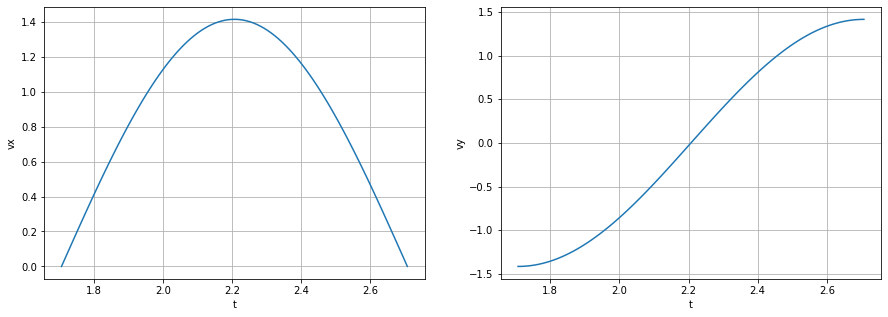

In [ ]:
# initialisation de la figure
plt.figure(figsize=(15,5))

# graphique pour vx
plt.subplot(1,2,1)
plt.plot(t,vx)
plt.grid()
plt.xlabel('t')
plt.ylabel('vx')

# graphique pour vy
plt.subplot(1,2,2)
plt.plot(t,vy)
plt.grid()
plt.xlabel('t')
plt.ylabel('vy')

In [ ]:
n = 3 # indice
t = np.linspace(t_sortie[n+1] - 1, t_sortie[n+1], Np) # vecteur temps t entre t_4 - 1 et t_4
vx, vy = vD(t,t_sortie,n) # composantes de la vitesse entre t_4 - 1 et t_4

Text(0, 0.5, 'vy')

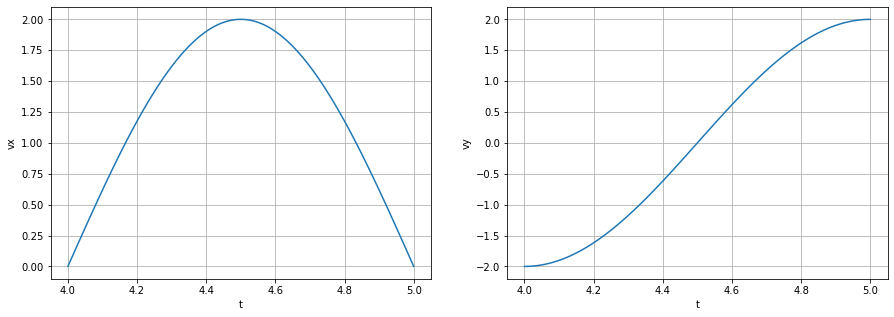

In [8]:
# initialisation de la figure
plt.figure(figsize=(15,5))

# graphique pour vx
plt.subplot(1,2,1)
plt.plot(t,vx)
plt.grid()
plt.xlabel('t')
plt.ylabel('vx')

# graphique pour vy
plt.subplot(1,2,2)
plt.plot(t,vy)
plt.grid()
plt.xlabel('t')
plt.ylabel('vy')

In [ ]:
# Question 5

def find_max(v, t):
    ''' 
        Trouver le maximum v_max d'un tableau de vitesse v, et le temps
        t_max correspondant à ce maximum

        arg:
            v (numpy array): tableau de valeurs des vitesses
            t (numpy array): tableau de temps correspondant
    '''
    # trouver le max du tableau v avec sort
    v_sorted = np.sort(v)
    v_sorted = np.flip(v_sorted)
    v_max = v_sorted[0]
    
    # trouver le t correspondant
    mask = np.argsort(v)
    mask = np.flip(mask)
    t_sorted = t[mask]
    t_max = t_sorted[0]

    return t_max, v_max

In [13]:
# Maximum des composantes de la vitesse pour le temps t entre t_2 - 1 et t_2
n = 1 # indice
t = np.linspace(t_sortie[n+1] - 1, t_sortie[n+1], Np) # vecteur temps t entre t_2 - 1 et t_2
vx, vy = vD(t,t_sortie,n) # composantes de la vitesse entre t_2 - 1 et t_2

# affichage des valeurs
print('(t_max, vx_max) = ', find_max(vx,t))
print('(t_max, vy_max) = ', find_max(vy,t))

(t_max, vx_max) =  (2.2020562761360423, 1.4140355520223618)
(t_max, vy_max) =  (2.7071067811865475, 1.4142135623730951)


In [14]:
# Maximum des composantes de la vitesse pour le temps t entre t_4 - 1 et t_4
n = 3 # indice
t = np.linspace(t_sortie[n+1] - 1, t_sortie[n+1], Np) # vecteur temps t entre t_4 - 1 et t_4
vx, vy = vD(t,t_sortie,n) # composantes de la vitesse entre t_4 - 1 et t_4

# affichage des valeurs
print('(t_max, vx_max) = ', find_max(vx,t))
print('(t_max, vy_max) = ', find_max(vy,t))

(t_max, vx_max) =  (4.494949494949495, 1.9997482553477501)
(t_max, vy_max) =  (5.0, 2.0)


On peut voir que le maximum de la composante $v_x$ intervient quand la composante $v_y$ est nulle, et inversement. De plus, les valeurs des deux maximums ont l'air similaires, ce qui serait compatible avec un mouvement circulaire sans changement d'énergie.

## Partie II
6. Représenter $v_x$ et $v_y$ en fonction de $t$ pour $t$ variant de $0$ à $t_6$. On utilisera une couleur unique pour la courbe par morceaux. On remarque que $v_x$ et $v_y$ sont des fonctions continues du temps $t$. Commenter.
7. Représenter le module de la vitesse $\sqrt{v_x^2+v_y^2}$ en fonction de $t$ pour $t$ variant de $0$ à $t_6$. On utilisera une couleur unique pour la courbe par morceaux. Commenter. A quoi sert un cyclotron ?
8. Pour $n$ variant de $0$ à $50$, représenter le module de la vitesse $\sqrt{v_x(t_n)^2+v_y(t_n)^2}$ en fonction de $t_n-n$, qui est le temps total passé par le proton entre les D à l'instant $t_n$. Commenter.

In [15]:
# Question 6

def vlin(t,t_sortie,n):
    ''' 
        fonction définissant les vitesses vx et vy dans la partie linéaire
        pour t variant de t_n à t_(n+1) - 1

        arg:
            t (numpy array): tableau temps t
            t_sortie (numpy array): tableau des temps de sortie t_n
            n (integer): indice
    '''
    vx = np.zeros(t.shape)
    vy = (-1)**n * (np.sqrt(n) + (t - t_sortie[n])/tau)
    return vx,vy

Text(0, 0.5, 'vy')

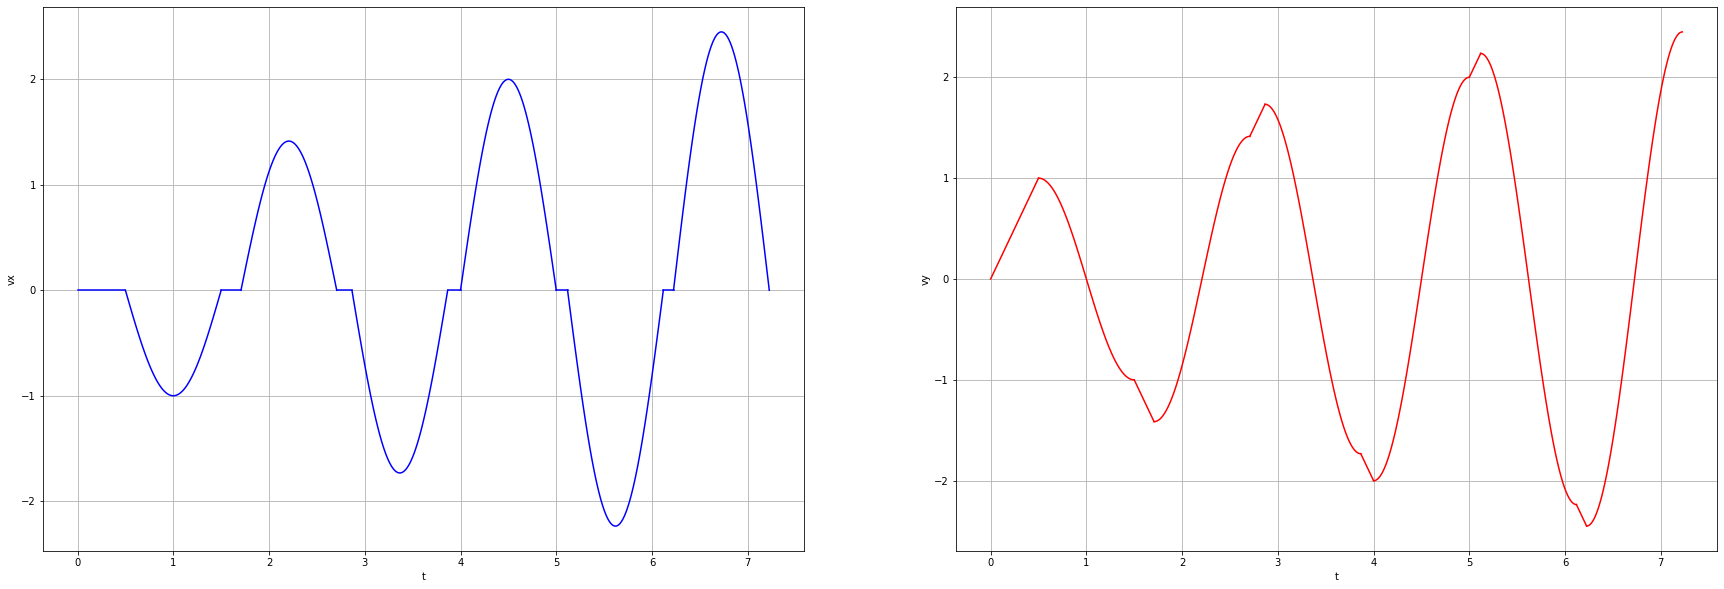

In [19]:
Nmax = 6 # indice max

# initialisation de la figure
plt.figure(figsize=(30,10))

# tracé des vitesse dans les boucles "D"
for n in range(6):
    t = np.linspace(t_sortie[n+1] - 1, t_sortie[n+1], Np) # vecteur temps t entre t_(n+1) - 1 et t_(n+1)
    vx, vy = vD(t,t_sortie,n) # composantes de la vitesse entre t_(n+1) - 1 et t_(n+1)

    # tracé de vx
    plt.subplot(1,2,1)
    plt.plot(t,vx,'b')

    # tracé de vy
    plt.subplot(1,2,2)
    plt.plot(t,vy,'r')

# tracé des vitesse dans la partie linéaire
for n in range(6):
    t = np.linspace(t_sortie[n], t_sortie[n+1] - 1, Np) # vecteur temps t entre t_n et t_(n+1) - 1
    vx, vy = vlin(t,t_sortie,n) # composantes de la vitesse entre t_n et t_(n+1) - 1

    # tracé de vx
    plt.subplot(1,2,1)
    plt.plot(t,vx,'b')

    # tracé de vy
    plt.subplot(1,2,2)
    plt.plot(t,vy,'r')

# nommer les axes
plt.subplot(1,2,1)
plt.grid()
plt.xlabel('t')
plt.ylabel('vx')

plt.subplot(1,2,2)
plt.grid()
plt.xlabel('t')
plt.ylabel('vy')

On voit que les extrema des composantes $v_x$ et $v_y$ augmentent.

Text(0.5, 0, 't')

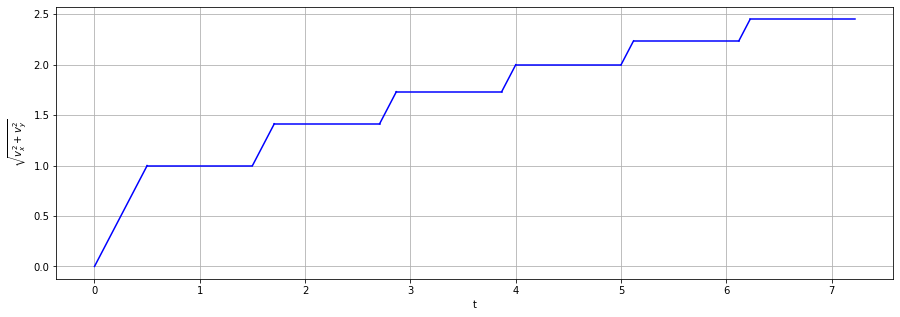

In [21]:
# Question 7

# initialisation de la figure
plt.figure(figsize=(15,5))

# calcul du module de la vitesse dans les boucles "D"
for n in range(6):
    t = np.linspace(t_sortie[n+1] - 1, t_sortie[n+1], Np) # vecteur temps t entre t_(n+1) - 1 et t_(n+1)
    vx, vy = vD(t,t_sortie,n) # composantes de la vitesse entre t_(n+1) - 1 et t_(n+1)

    # tracé du module de la vitesse
    plt.plot(t,np.sqrt(vx**2 + vy**2), 'b')

# calcul du module de la vitesse dans les parties linéaires
for n in range(6):
    t = np.linspace(t_sortie[n], t_sortie[n+1] - 1, Np) # vecteur temps t entre t_n et t_(n+1) - 1
    vx, vy = vlin(t,t_sortie,n) # composantes de la vitesse entre t_n et t_(n+1) - 1

    # tracé du module de la vitesse
    plt.plot(t,np.sqrt(vx**2 + vy**2), 'b')

# Nommer les axes
plt.grid()
plt.ylabel('$\sqrt{v_x^2 + v_y^2}$')
plt.xlabel('t')

On voit que le module de la vitesse augmente dans la partie linéaire, alors qu'il est constant dans les boucles "D". Ainsi, le cyclotron sert à accélerer la particule dans la partie linéaire (augmenter son énergie cinétique), alors qu'il dévie sa trajectoire dans les boucles "D" (à module de vitesse constant), afin de pouvoir refaire passer la particule dans la partie linéaire.

Text(0.5, 0, '$t_n - n$')

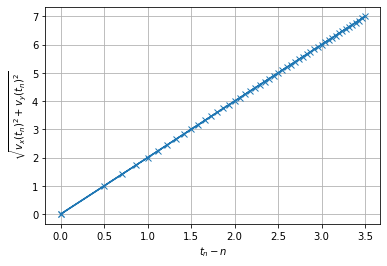

In [22]:
# Question 8

v_n = np.empty(t_sortie.shape) # module de la vitesse au temps t_n
duree_n = np.empty(t_sortie.shape) # temps total passé dans la partie linéaire

for i in range(N):
    v_n[i] = np.sqrt(i)
    duree_n[i] = t_sortie[i] - i

# graphique
plt.plot(duree_n, v_n, 'x-')
plt.grid()
plt.ylabel('$\sqrt{v_x(t_n)^2 + v_y(t_n)^2}$')
plt.xlabel('$t_n - n$')

On voit que la relation est linéaire.